In [1]:
import glob
import cv2
import numpy as np
#Importing Training Data 

train1all = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_0/all/*.bmp")]
train1hem = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_0/hem/*.bmp")]
train2all = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_1/all/*.bmp")]
train2hem = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_1/hem/*.bmp")]
train3all = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_2/all/*.bmp")]
train3hem = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_2/hem/*.bmp")]

In [10]:
trainall = train1all +train2all +train3all
trainhem = train1hem +train2hem +train3hem

trainall = train1all +train2all +train3all
trainhem = train1hem +train2hem +train3hem
y_train = [1]*len(trainall) + [0]*len(trainhem) #Setting 1s to Leukemia Immature Cell and 0s to Normal Cell
x_train = trainall+trainhem
y_train = np.array(y_train)
x_train = np.array(x_train)

In [12]:
print('Class Imbalance:', len(trainall), len(trainhem))  #Class imbalance

#Flipping Minor class sample to generate more samples
trainhemTemp = np.array(trainhem)
trainhemF = np.flipud(trainhemTest) #Flip Vertically
#Adding In Augmented Data to Balance Classes
y_trainTemp = np.zeros(len(trainhemF)) #Labels 0 = Normal Cell
x_train = np.concatenate((x_train, trainhemF), axis=0)
y_train = np.concatenate((y_train, y_trainTemp), axis=0)

7272 3389
3389


In [14]:
#Importing Testing Data
x_test = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/validation_data/C-NMC_test_prelim_phase_data/*.bmp")]

import pandas as pd
ylabels = pd.read_csv (r'C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/validation_data/C-NMC_test_prelim_phase_data_labels.csv')
y_test = ylabels[ylabels.columns[2]]
print(y_test)
                       

0       1
1       1
2       1
3       0
4       1
       ..
1862    1
1863    1
1864    0
1865    1
1866    1
Name: labels, Length: 1867, dtype: int64


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


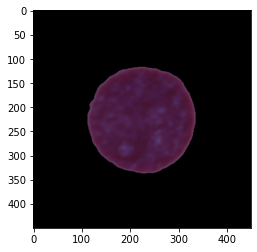

In [20]:
#Reviewing and Resizing Images To Be Smaller
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = x_test[1]
imgplot = plt.imshow(image)
plt.show()

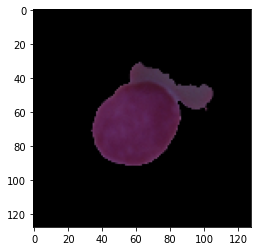

In [22]:
#Resizing Images to be Smaller
image = train1all[0]
resized_image = cv2.resize(image, dsize=(128,128), interpolation=cv2.INTER_CUBIC)
x_Strain = [resized_image]*len(x_train)

for n in range(len(x_train)):
    x_Strain[n] =  cv2.resize(x_train[n], dsize=(128,128), interpolation=cv2.INTER_CUBIC)
imgplot = plt.imshow(x_Strain[2003])


In [23]:
#Normalizing RBG Values
x_Strain = np.array(x_Strain)
x_Ntrain = x_Strain.astype("float32") / 255

print("x_Ntrain shape:", x_Ntrain.shape)
print(x_Ntrain.shape[0], "train samples")

x_Ntrain shape: (10661, 128, 128, 3)
10661 train samples


In [24]:
#Building the Model
from keras.layers import Activation, Dense
from keras.models import Sequential 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = x_Strain[1].shape #128, 128, 3

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                2880050   
_________________________________________________________________
activation (Activation)      (None, 50)                0

In [26]:
batch_size = 150
epochs = 30

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

training = model.fit(x_Ntrain, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
64/64 [==============================] - 36s 541ms/step - loss: 0.4114 - accuracy: 0.8278 - val_loss: 1.4660 - val_accuracy: 0.3674
Epoch 2/30
64/64 [==============================] - 36s 565ms/step - loss: 0.3747 - accuracy: 0.8459 - val_loss: 1.3127 - val_accuracy: 0.4480
Epoch 3/30
64/64 [==============================] - 36s 555ms/step - loss: 0.3578 - accuracy: 0.8551 - val_loss: 1.4121 - val_accuracy: 0.3758
Epoch 4/30
64/64 [==============================] - 37s 584ms/step - loss: 0.3420 - accuracy: 0.8607 - val_loss: 1.0408 - val_accuracy: 0.4958
Epoch 5/30
64/64 [==============================] - 38s 590ms/step - loss: 0.3217 - accuracy: 0.8710 - val_loss: 1.0607 - val_accuracy: 0.5473
Epoch 6/30
64/64 [==============================] - 36s 564ms/step - loss: 0.2939 - accuracy: 0.8838 - val_loss: 1.5437 - val_accuracy: 0.4274
Epoch 7/30
64/64 [==============================] - 36s 564ms/step - loss: 0.2746 - accuracy: 0.8960 - val_loss: 1.4158 - val_accuracy: 0.4789

In [27]:
xl = list(range(epochs))
vy = training.history['val_loss']
ty = training.history['loss']

plt.plot( xl, vy,  label='Validation' )
plt.plot( xl, ty, label='Train' )
plt.show()


NameError: name 'training' is not defined

In [28]:
xl = list(range(epochs))
vy = training.history['val_accuracy']
ty = training.history['accuracy']

plt.plot( xl, vy,  label='Validation' )
plt.plot( xl, ty, label='Train' )
plt.legend()
plt.show()

NameError: name 'training' is not defined